In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [2]:
boston_data = load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
data = boston_data['data']
data.shape

(506, 13)

In [4]:
feature_names = boston_data['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
target = boston_data['target']
target.shape

(506,)

In [6]:
X = pd.DataFrame(data = data, columns = feature_names)

In [7]:
y = pd.DataFrame(data = target, columns = ['price'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = feature_names)

In [11]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne[:5]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ],
       [ 37.924854 ,  13.517046 ],
       [ -8.786393 ,   3.9951665]], dtype=float32)

In [14]:
print('До: \t{}'.format(X_train_scaled.shape))
print('После: \t{}'.format(X_train_tsne.shape))

До: 	(404, 13)
После: 	(404, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

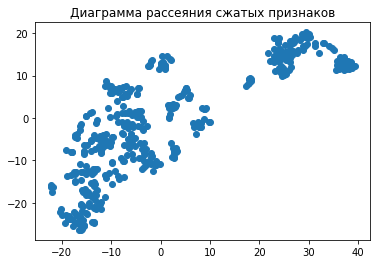

In [18]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.title('Диаграмма рассеяния сжатых признаков')
plt.show

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [20]:
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)
labels_train = model.fit_predict(X_train_scaled)

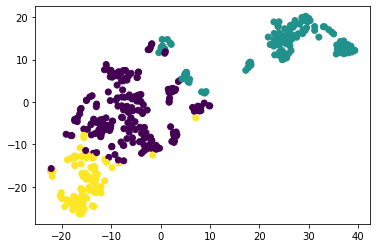

In [25]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.show()

In [34]:
crim_0 = X_train.loc[labels_train == 0, 'CRIM'].mean()
crim_1 = X_train.loc[labels_train == 1, 'CRIM'].mean()
crim_2 = X_train.loc[labels_train == 2, 'CRIM'].mean()

In [38]:
# кластер 0
print(f'Среднее значение price для кластера 0: {y_train[labels_train == 0].mean()[0]}')
print(f'Среднее значение признака CRIM для кластера 0: {crim_0}')

Среднее значение price для кластера 0: 24.958115183246072
Среднее значение признака CRIM для кластера 0: 0.42166020942408367


In [39]:
# кластер 1
print(f'Среднее значение price для кластера 1: {y_train[labels_train == 1].mean()[0]}')
print(f'Среднее значение признака CRIM для кластера 1: {crim_1}')

Среднее значение price для кластера 1: 16.165354330708666
Среднее значение признака CRIM для кластера 1: 10.797028425196853


In [40]:
# кластер 2
print(f'Среднее значение price для кластера 2: {y_train[labels_train == 2].mean()[0]}')
print(f'Среднее значение признака CRIM для кластера 2: {crim_2}')

Среднее значение price для кластера 2: 27.788372093023252
Среднее значение признака CRIM для кластера 2: 0.07356558139534886


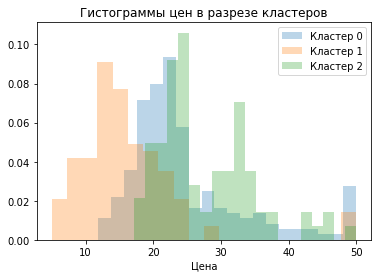

In [46]:
plt.hist(y_train[labels_train == 0], bins = 20, density = True, alpha = 0.3)
plt.hist(y_train[labels_train == 1], bins = 20, density = True, alpha = 0.3)
plt.hist(y_train[labels_train == 2], bins = 20, density = True, alpha = 0.3)
plt.title('Гистограммы цен в разрезе кластеров')
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.show()

*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [48]:
labels_test = model.predict(X_test_scaled)

In [51]:
crim_test_0 = X_test.loc[labels_test == 0, 'CRIM'].mean()
crim_test_1 = X_test.loc[labels_test == 1, 'CRIM'].mean()
crim_test_2 = X_test.loc[labels_test == 2, 'CRIM'].mean()

In [52]:
# кластер 0 на тесте
print(f'Среднее значение price для кластера 0: {y_test[labels_test == 0].mean()[0]}')
print(f'Среднее значение признака CRIM для кластера 0: {crim_test_0}')

Среднее значение price для кластера 0: 21.860784313725492
Среднее значение признака CRIM для кластера 0: 0.26607882352941176


In [53]:
# кластер 1 на тесте
print(f'Среднее значение price для кластера 1: {y_test[labels_test == 1].mean()[0]}')
print(f'Среднее значение признака CRIM для кластера 1: {crim_test_1}')

Среднее значение price для кластера 1: 16.437142857142856
Среднее значение признака CRIM для кластера 1: 10.165531142857143


In [54]:
# кластер 2 на тесте
print(f'Среднее значение price для кластера 2: {y_test[labels_test == 2].mean()[0]}')
print(f'Среднее значение признака CRIM для кластера 2: {crim_test_2}')

Среднее значение price для кластера 2: 31.35
Среднее значение признака CRIM для кластера 2: 0.062060000000000004


In [60]:
info = [[y_train[labels_train == 0].mean()[0], y_test[labels_test == 0].mean()[0], crim_0, crim_test_0],
       [y_train[labels_train == 1].mean()[0], y_test[labels_test == 1].mean()[0], crim_1, crim_test_1],
       [y_train[labels_train == 2].mean()[0], y_test[labels_test == 2].mean()[0], crim_2, crim_test_2]]

In [66]:
df = pd.DataFrame(data = info, columns = ['price_train', 'price_test', 'CRIM_train', 'CRIM_test'], 
                  index = ['cluster 0', 'cluster 1', 'cluster 2'])

In [67]:
df

,price_train,price_test,CRIM_train,CRIM_test
cluster 0,24.958115,21.860784,0.421660,0.266079
cluster 1,16.165354,16.437143,10.797028,10.165531
cluster 2,27.788372,31.350000,0.073566,0.062060
